# Breast Cancer Prediction Project

Welcome to the Breast Cancer Prediction project! 🎯

In this beginner-friendly notebook, we'll walk through a step-by-step machine learning pipeline to predict whether a tumor is malignant or benign based on various features.

## 🔍 Objective

Our goal is to build a machine learning model that can accurately predict whether a tumor is **malignant (M)** or **benign (B)** based on a set of measurements.

We'll use the dataset `Cancer_Data.csv` for this purpose.

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

##  Step 1: Load the Dataset

In [2]:
data = pd.read_csv(r"C:\Users\visma\Downloads\1744672203713\Cancer_Data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Step 2: Explore the Dataset

In [3]:
print("Shape:", data.shape)

Shape: (569, 33)


In [4]:
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
data.duplicated().sum()

0

In [9]:
target_col = 'diagnosis'   # change if your target column name is different
print(data[target_col].value_counts())
print(data.isnull().sum())
print("Duplicates:", data.duplicated().sum())

diagnosis
B    357
M    212
Name: count, dtype: int64
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst  

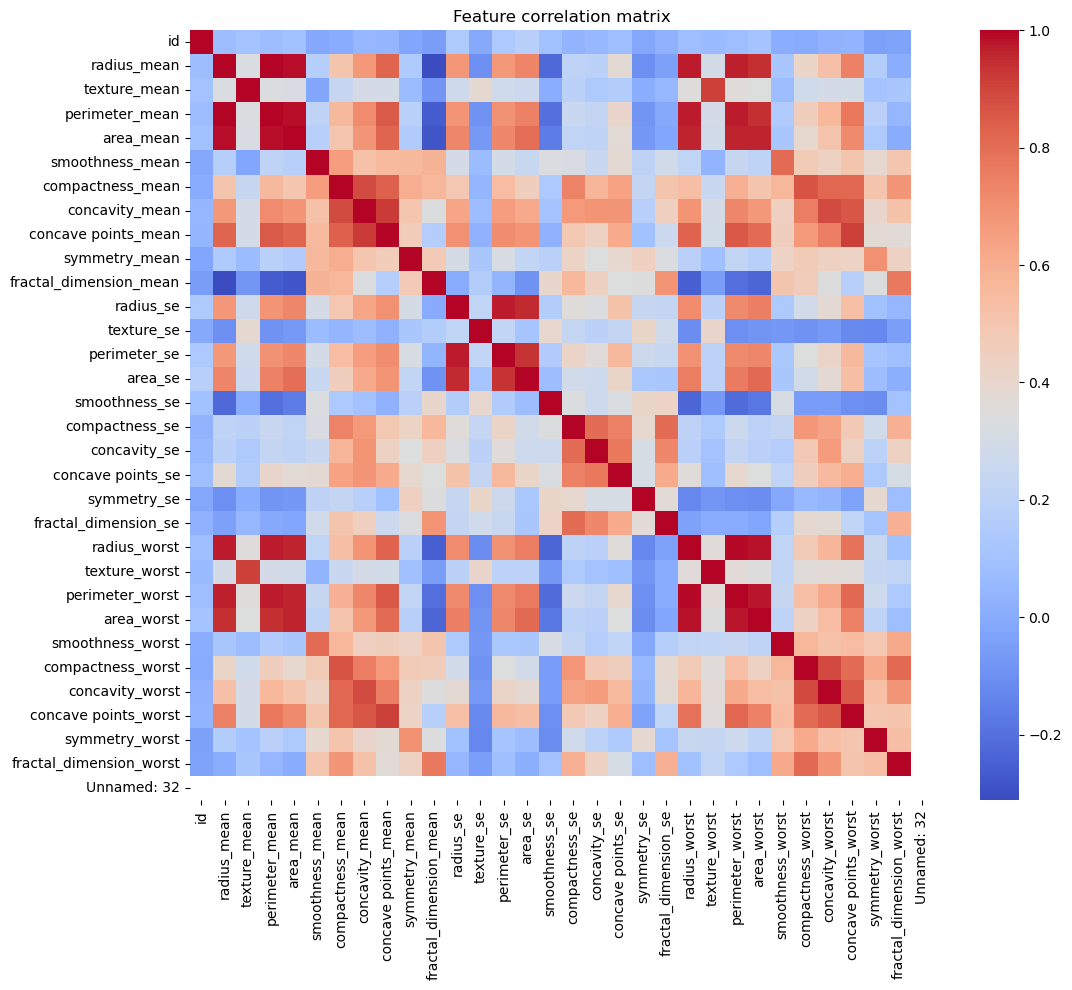

In [10]:
# Correlation
corr = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Feature correlation matrix")
plt.show()

##  Step 3: Clean the Data

We'll remove any unnecessary columns and handle missing values.

In [11]:
# Drop the 'Unnamed: 32' column and 'id'
data = data.copy()
# drop identifier if exists
if 'id' in data.columns:
    data.drop(columns=['id'], inplace=True)

# drop unnamed columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# encode target
data[target_col] = data[target_col].map({'M':1, 'B':0})  # adjust mapping to your labels

# drop duplicates
data.drop_duplicates(inplace=True)

# missing imputation (median)
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# outlier detection (IQR) - optional: winsorize or remove extreme rows
def remove_iqr_outliers(data, cols, factor=1.5):
    mask = pd.Series(True, index=data.index)
    for c in cols:
        Q1 = data[c].quantile(0.25)
        Q3 = data[c].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        mask &= data[c].between(lower, upper)
    return data[mask]


## Step 4: Visualize the Data

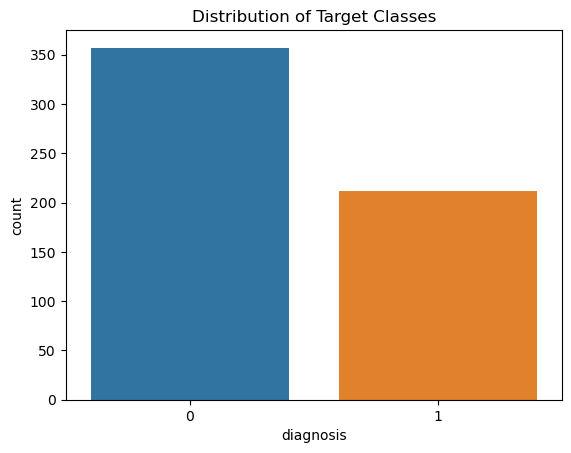

diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64


In [12]:
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Target Classes')
plt.show()

# Percentage
print(data['diagnosis'].value_counts(normalize=True)*100)

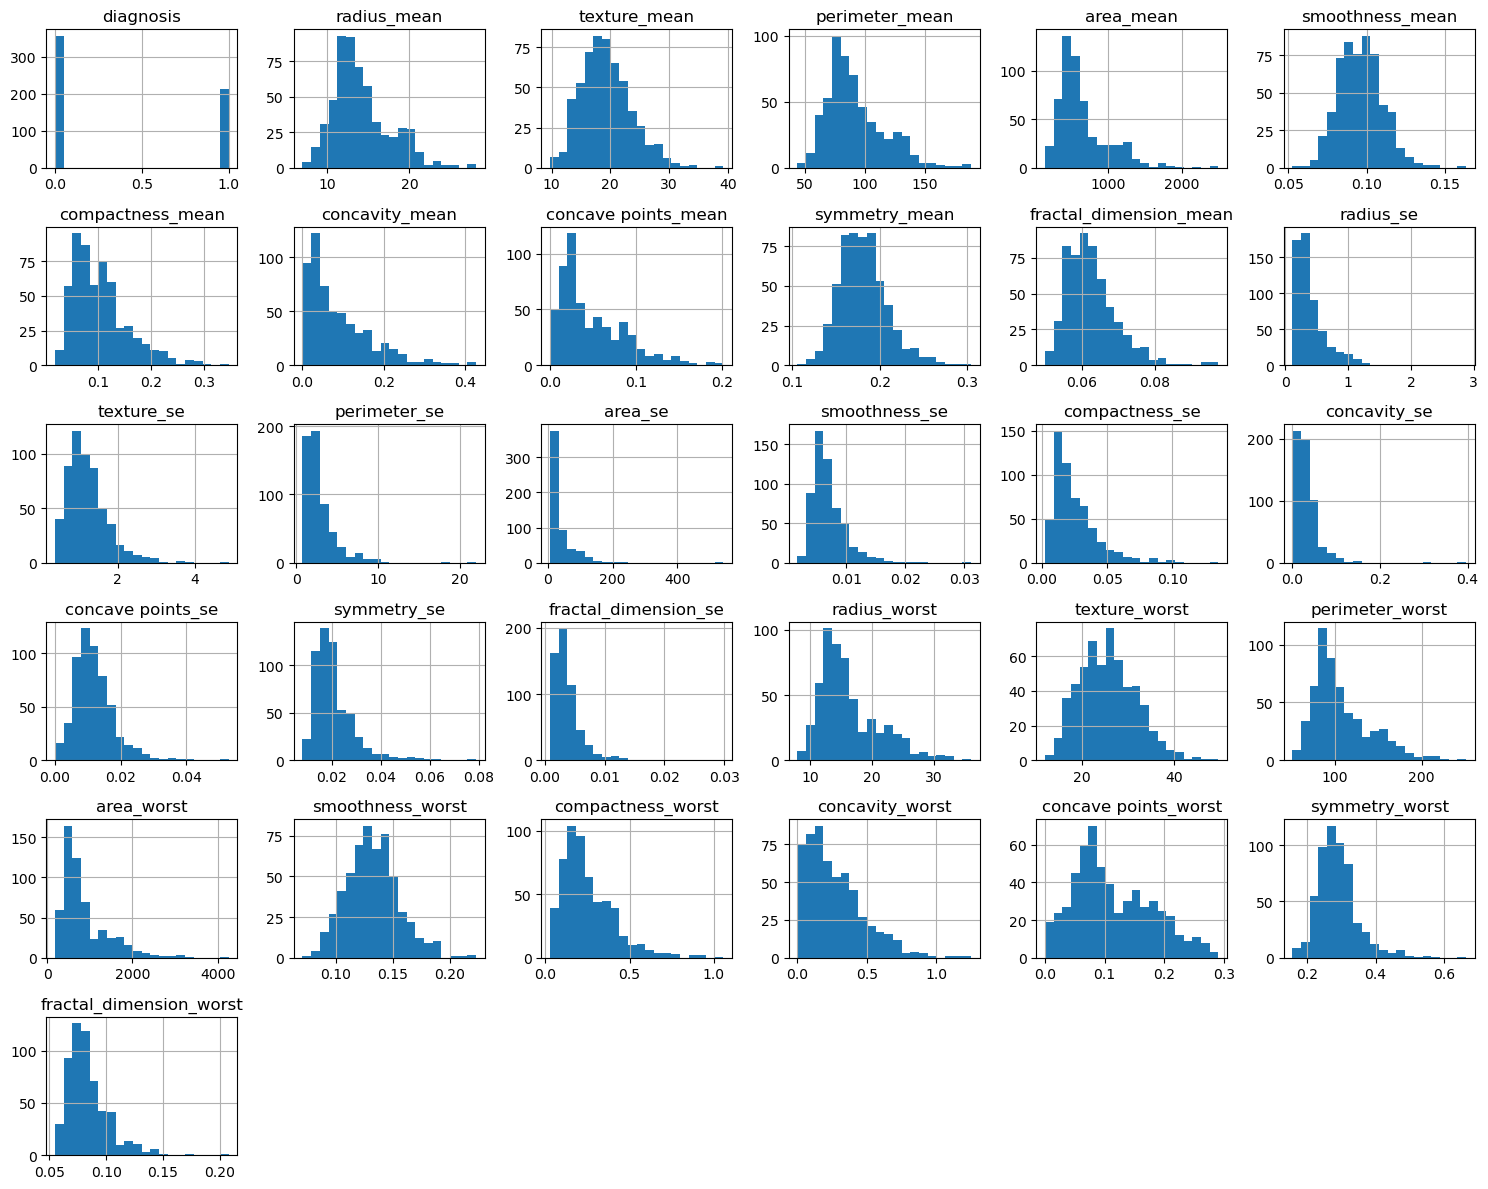

In [13]:
# histograms
data[num_cols].hist(bins=20, figsize=(15,12))
plt.tight_layout()
plt.show()

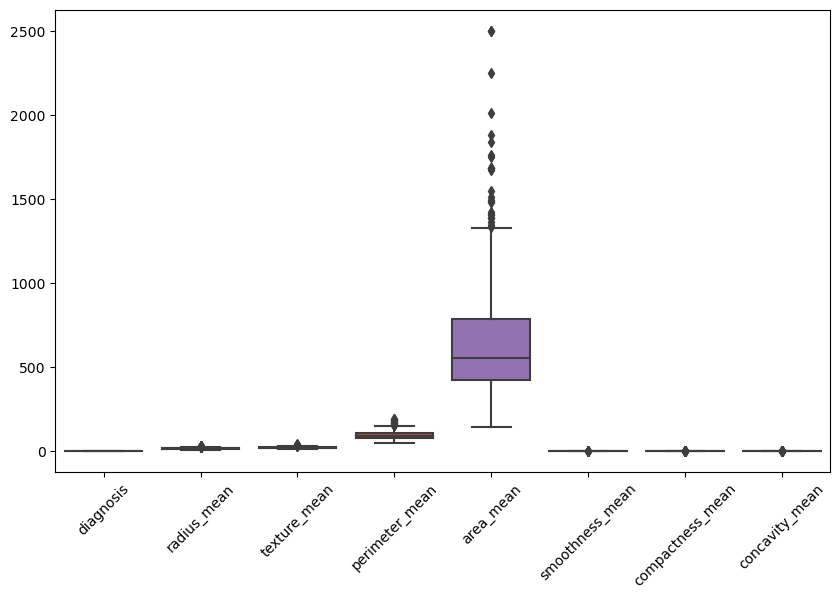

In [14]:
# boxplot for a few features
plt.figure(figsize=(10,6))
sns.boxplot(data=data[[num_cols[i] for i in range(0, min(8, len(num_cols)))]])
plt.xticks(rotation=45)
plt.show()

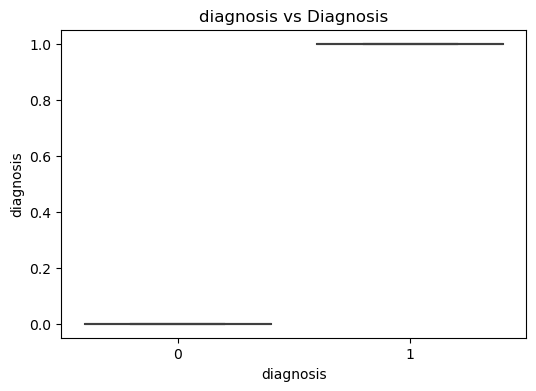

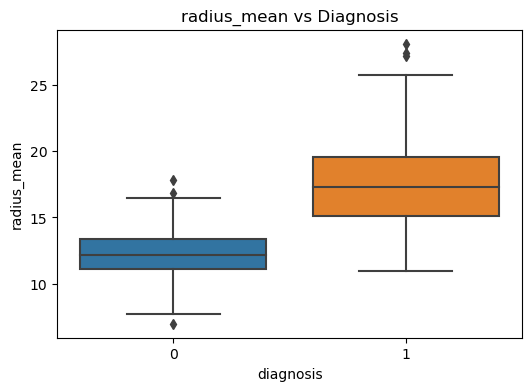

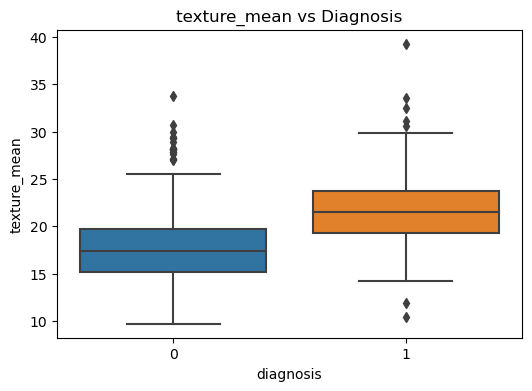

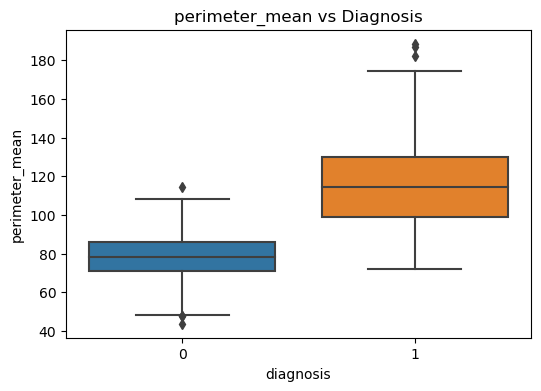

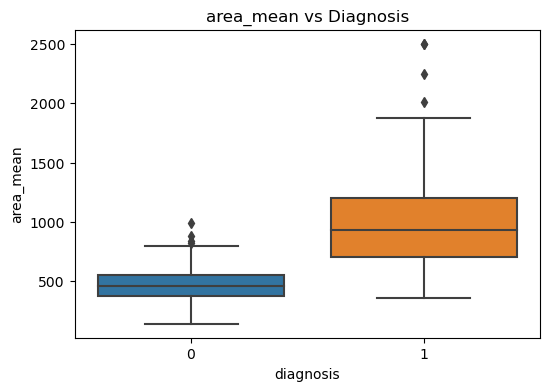

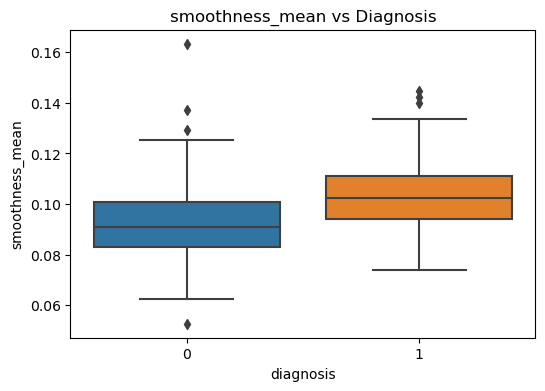

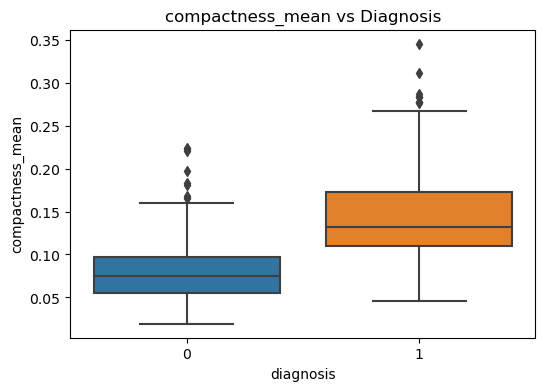

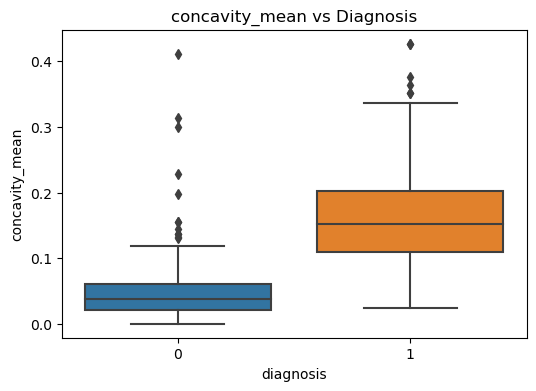

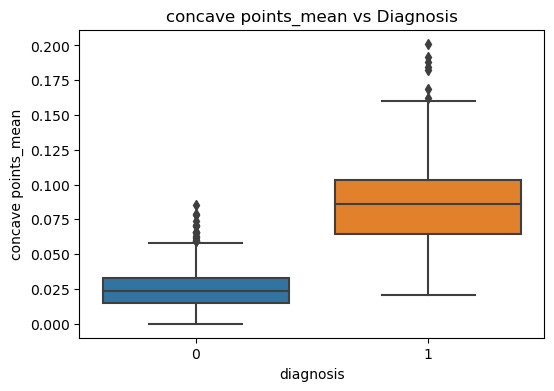

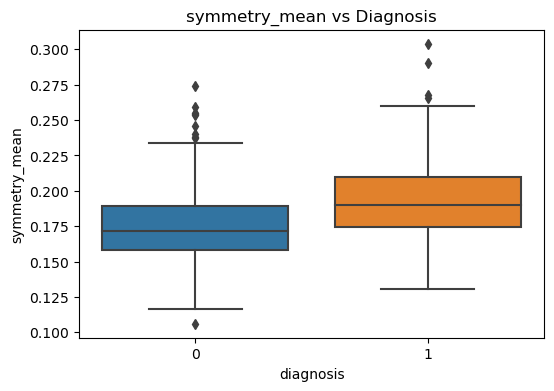

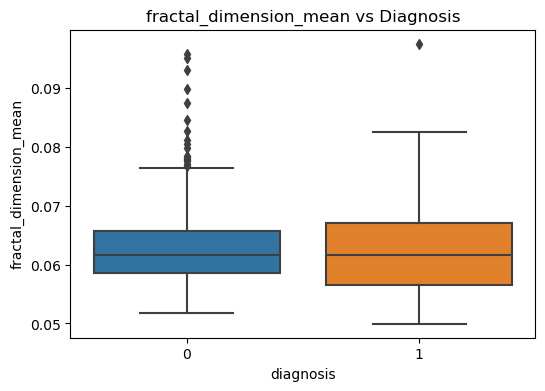

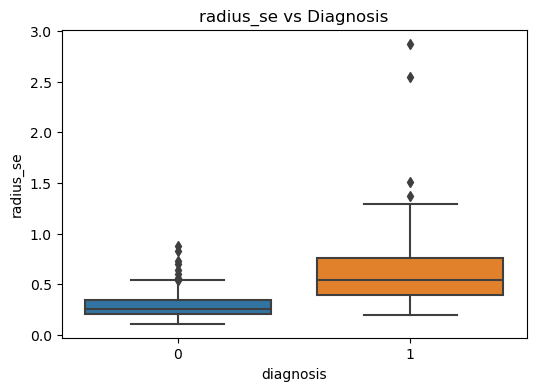

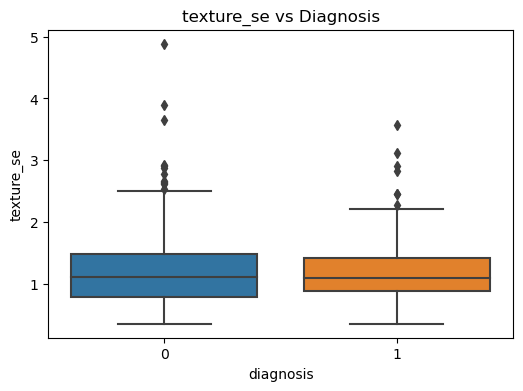

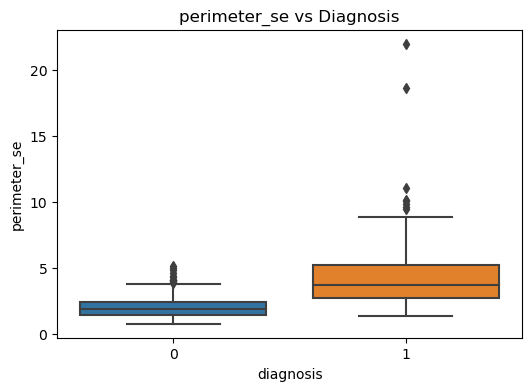

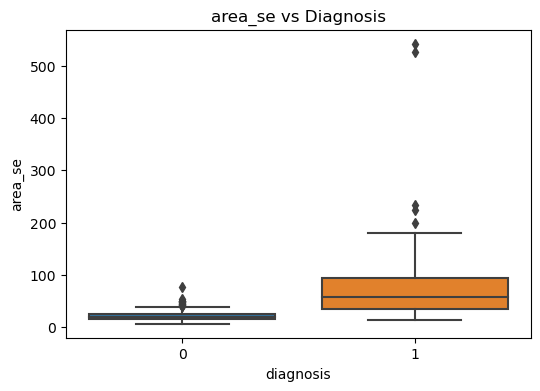

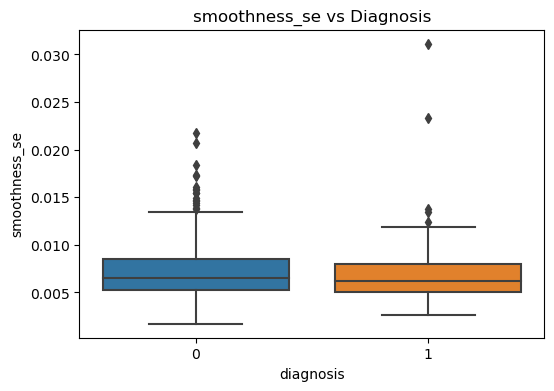

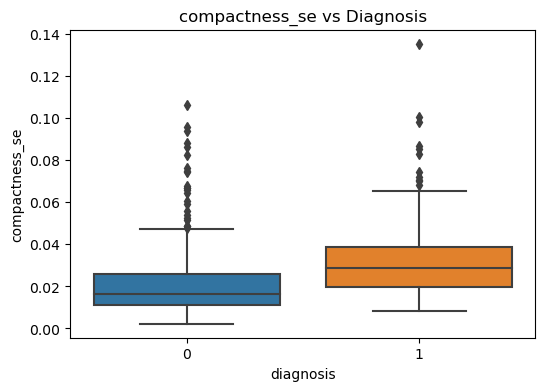

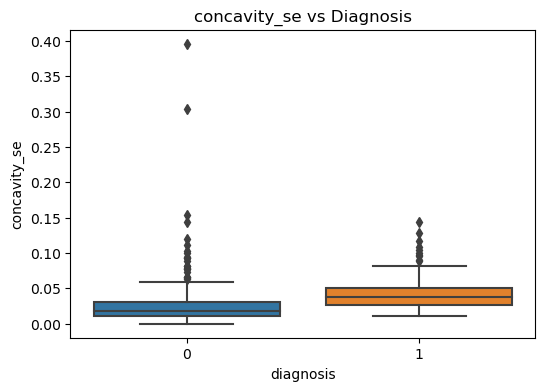

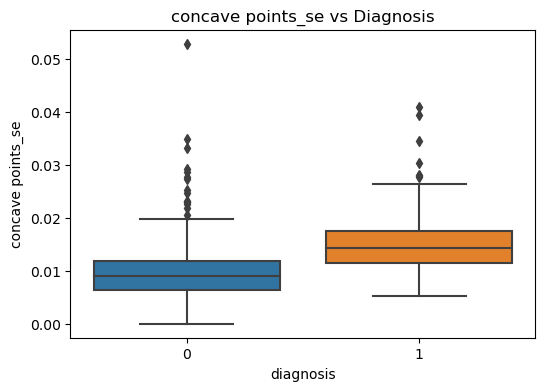

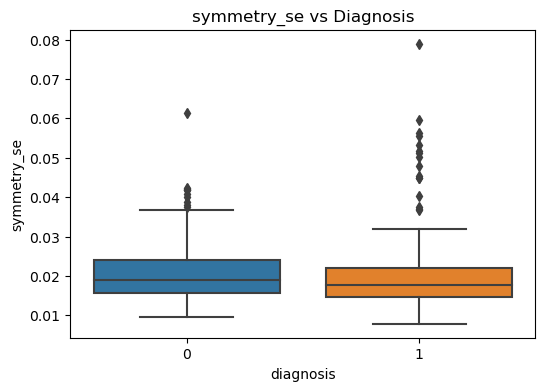

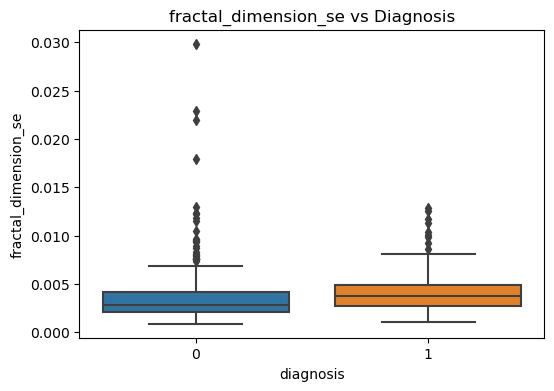

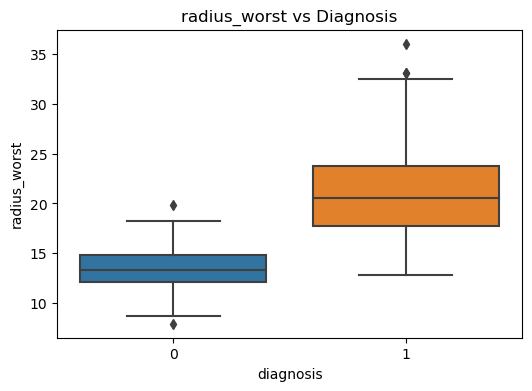

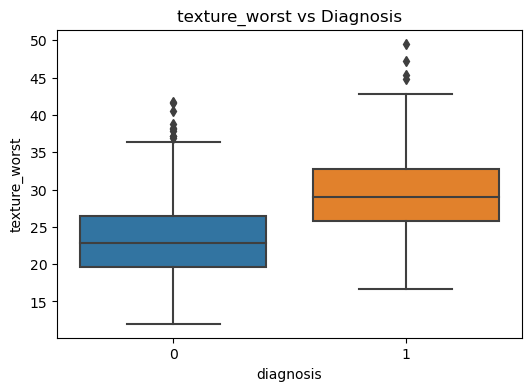

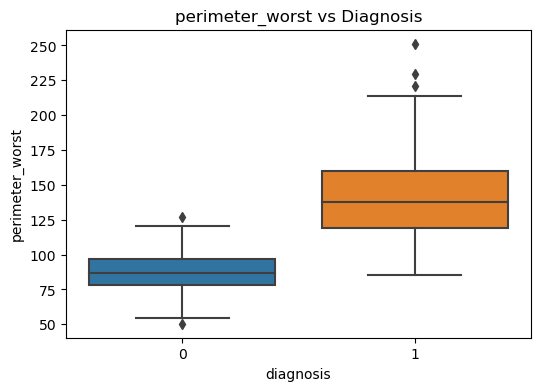

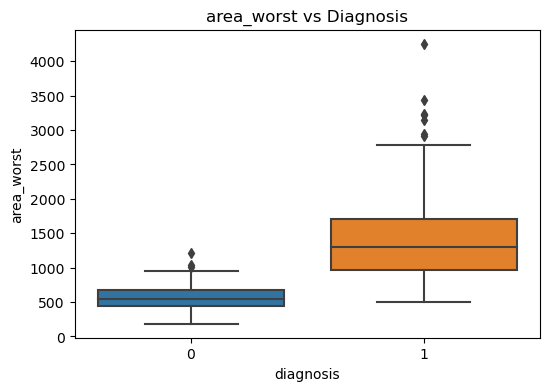

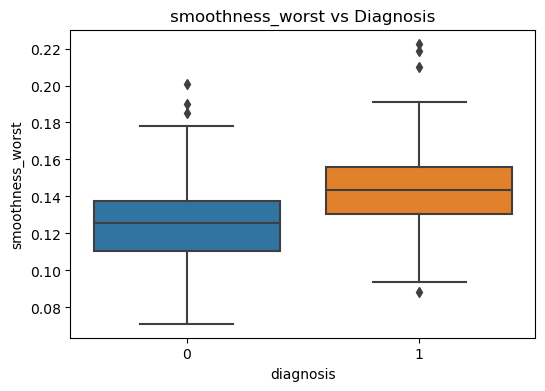

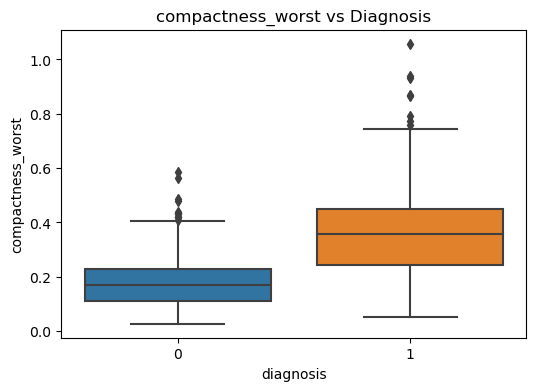

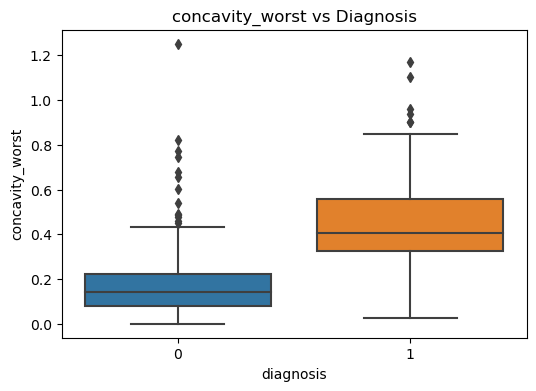

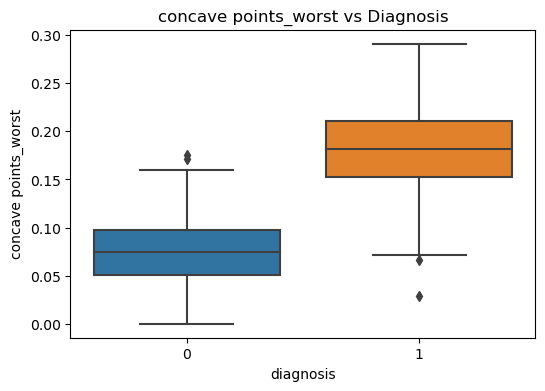

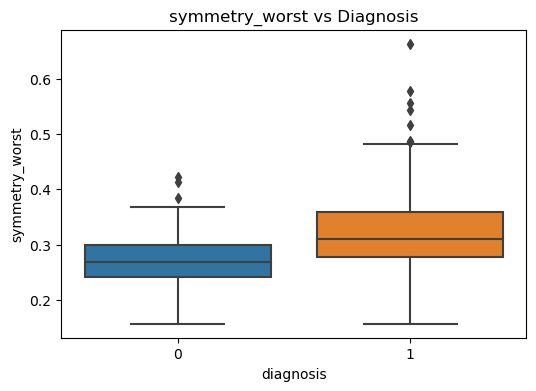

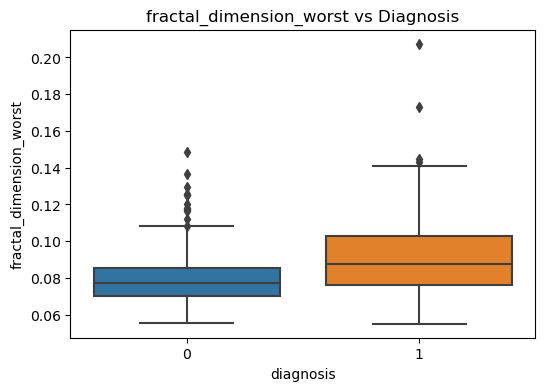

In [15]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='diagnosis', y=col, data=data)
    plt.title(f'{col} vs Diagnosis')
    plt.show()
    

In [16]:
print(data.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


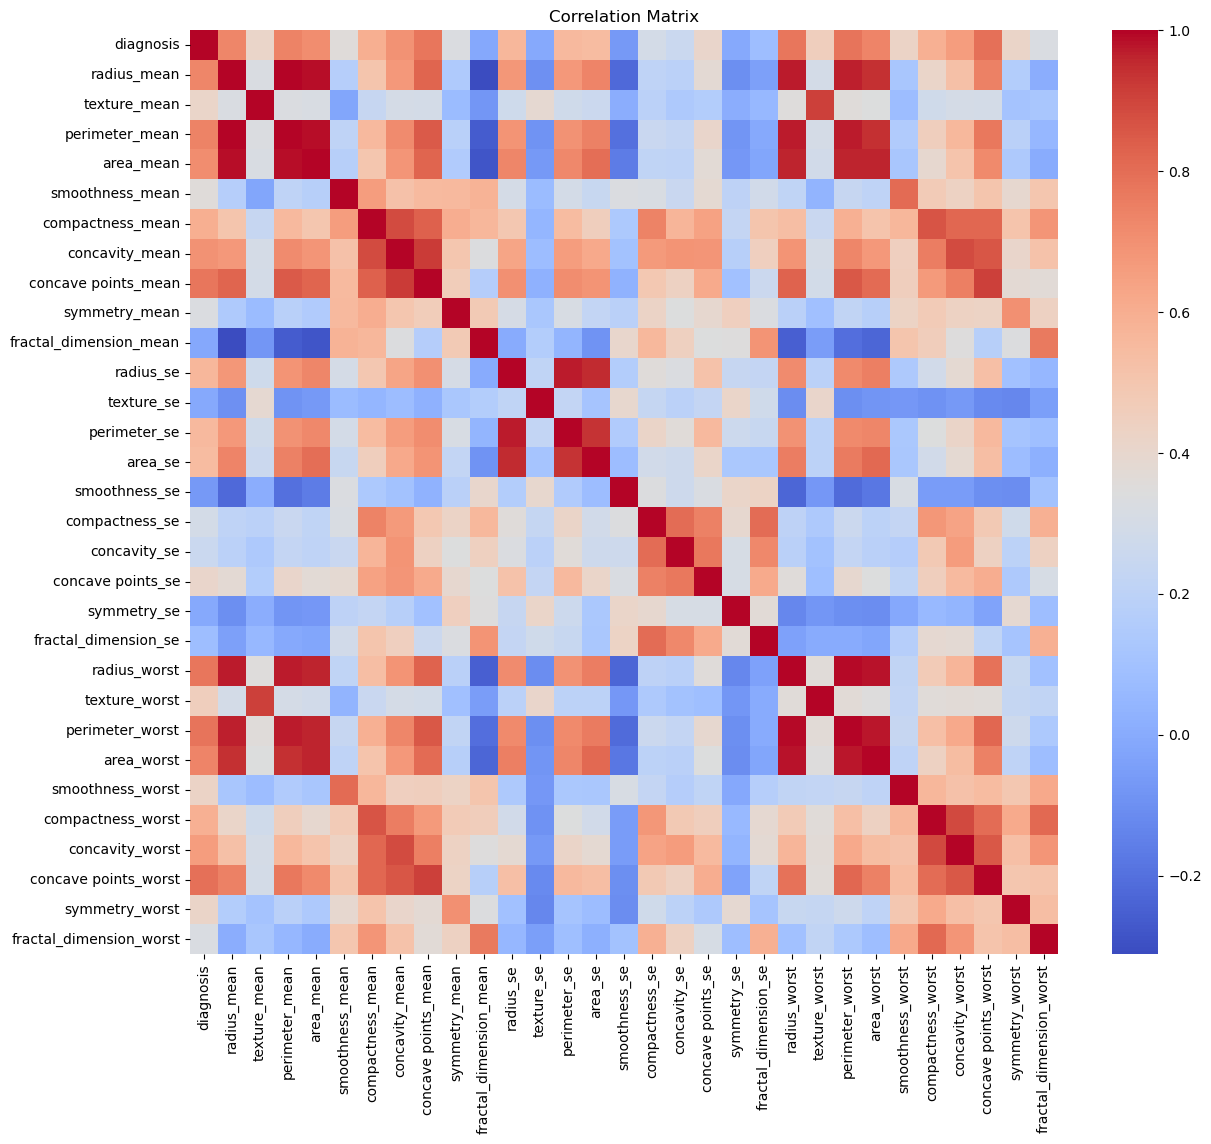

In [17]:
# Correlation heatmap
corr = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

In [18]:
# Top correlated features with target
target_col = 'diagnosis'
top_corr = corr[target_col].abs().sort_values(ascending=False)
print("\nTop 10 correlated features with target:")
print(top_corr.head(10))


Top 10 correlated features with target:
diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64


C:\Users\visma\anaconda3\a3\5555\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


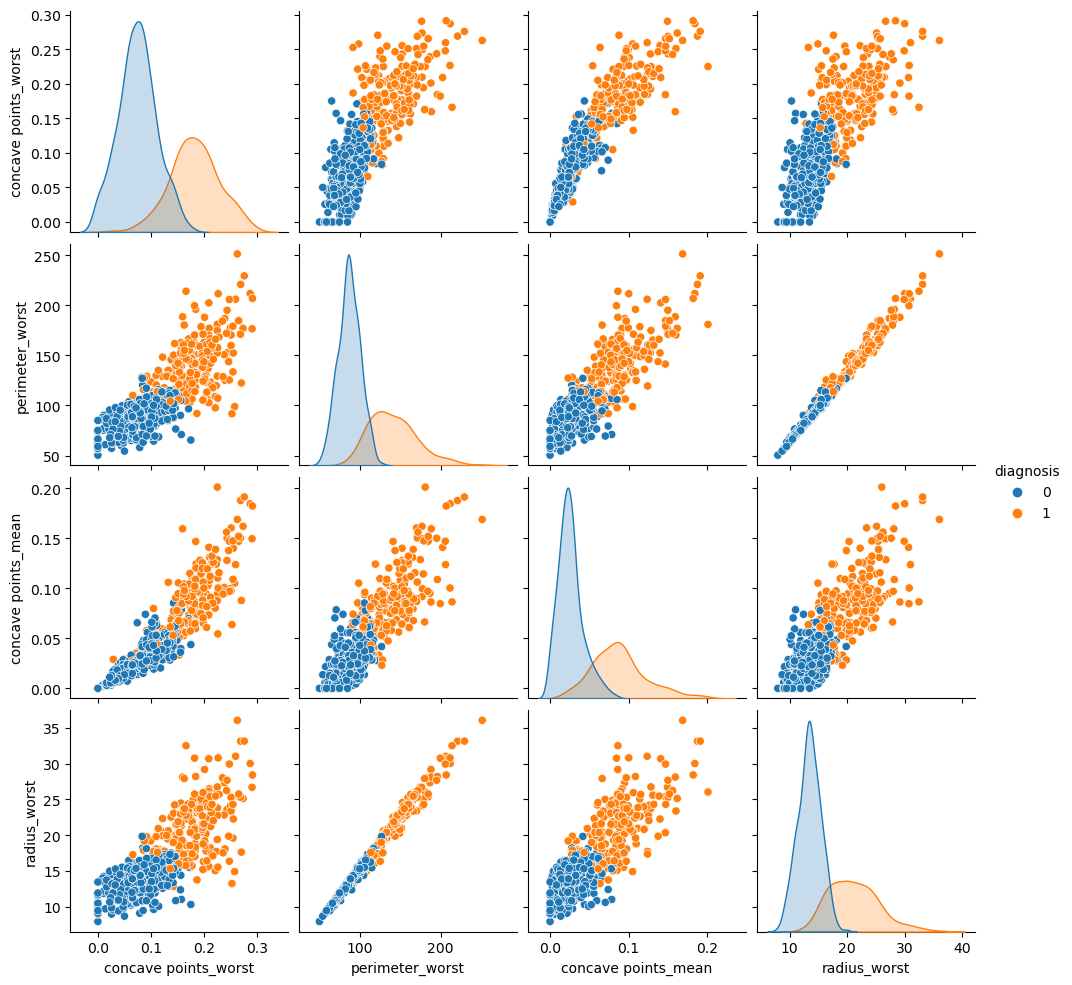

In [19]:
# Pairplot of top 4 correlated features
top_feats = top_corr.index[1:5]  # skip 'diagnosis' itself
sns.pairplot(data, vars=top_feats, hue=target_col)
plt.show()

## Step 5: Preprocess the Data

In [20]:
print(data['diagnosis'].unique())
print(data['diagnosis'].dtype)
print("Total rows:", len(data))

[1 0]
int64
Total rows: 569


In [24]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42)
}

## Step 6: Train and evaluate a Machine Learning Model

In [26]:
results = {}
for name, model in models.items():
    # Use scaled data for LR and SVM, original for tree-based
    if name in ['Random Forest', 'XGBoost']:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores = cross_val_score(model, X_train, y_train, cv=5)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'CV Mean Accuracy': scores.mean(),
        'CV Std': scores.std()
    }
    print(f"\n{name} Results:")
    print("Test Accuracy:", results[name]['Accuracy'])
    print("5-Fold CV Mean Accuracy:", results[name]['CV Mean Accuracy'])
    print("5-Fold CV Std:", results[name]['CV Std'])
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Benign','Malignant']))
    


Logistic Regression Results:
Test Accuracy: 0.9649122807017544
5-Fold CV Mean Accuracy: 0.9714285714285715
5-Fold CV Std: 0.011206636293610512

Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Random Forest Results:
Test Accuracy: 0.9736842105263158
5-Fold CV Mean Accuracy: 0.9626373626373628
5-Fold CV Std: 0.033763278012609275

Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



C:\Users\visma\anaconda3\a3\5555\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:42:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\visma\anaconda3\a3\5555\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:42:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\visma\anaconda3\a3\5555\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:42:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\visma\anaconda3\a3\5555\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:42:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }


XGBoost Results:
Test Accuracy: 0.9736842105263158
5-Fold CV Mean Accuracy: 0.9670329670329672
5-Fold CV Std: 0.02780024316631542

Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


SVM (RBF) Results:
Test Accuracy: 0.9736842105263158
5-Fold CV Mean Accuracy: 0.9758241758241759
5-Fold CV Std: 0.012815278889769889

Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



Test Accuracy: 0.9737

Confusion Matrix:
 [[72  0]
 [ 3 39]]


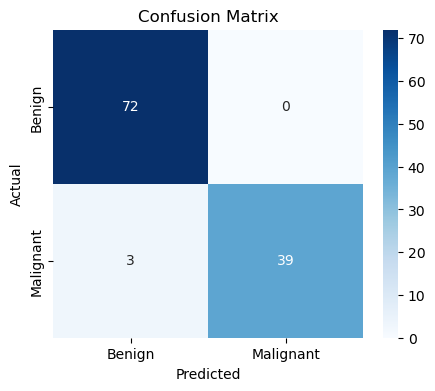


Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Benign','Malignant']))

## Step 7: Feature Importance for Tree-based Models

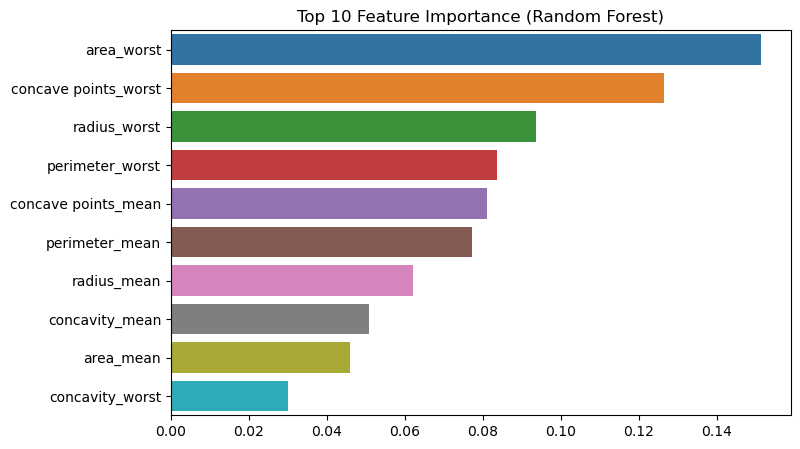

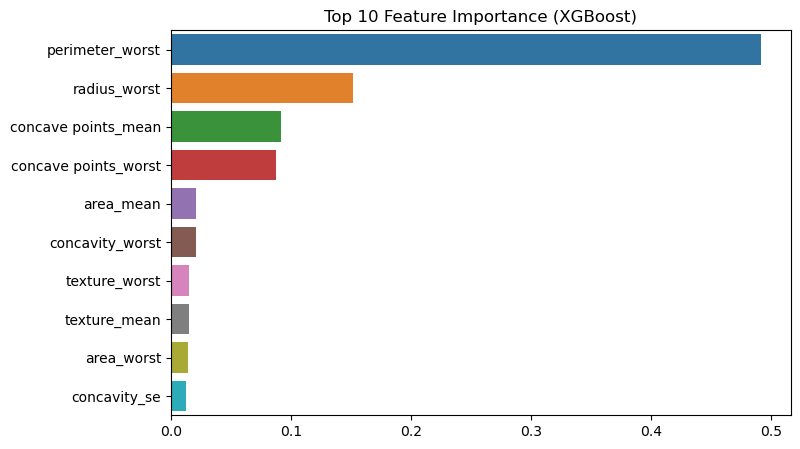

In [29]:
for name in ['Random Forest', 'XGBoost']:
    model = models[name]
    importances = model.feature_importances_
    feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(8,5))
    sns.barplot(x=feat_imp.values, y=feat_imp.index)
    plt.title(f'Top 10 Feature Importance ({name})')
    plt.show()

## Step 8: Hyperparameter Tuning (Example for Random Forest)

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Random Forest Params:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Evaluate best RF on test set
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("\nRandom Forest Test Accuracy (Best Model):", accuracy_score(y_test, y_pred_best_rf))

Best Random Forest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.9626373626373628

Random Forest Test Accuracy (Best Model): 0.9736842105263158


## Conclusion

We developed a machine learning pipeline to predict whether breast tumors are malignant or benign using the Cancer_Data.csv dataset. After exploring, cleaning, and visualizing the data, we trained multiple models—Logistic Regression, Random Forest, XGBoost, and SVM—and evaluated them using accuracy, cross-validation, classification reports, and confusion matrices. All models achieved high accuracy (~96–97%), with Random Forest, XGBoost, and SVM performing slightly better.

## Key Takeaway:
Machine learning can reliably assist in breast cancer diagnosis, and ensemble/kernel-based models provide strong predictive performance.